In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [3]:

# Carregar os dados do arquivo CSV
df_train = pd.read_csv('dados/train.csv')
df_test = pd.read_csv('dados/test.csv')
df_set1 = pd.read_csv('dados/set1.csv')
df_set2 = pd.read_csv('dados/set2.csv')
df_set3 = pd.read_csv('dados/set3.csv')

# Agora 'df' é um DataFrame que contém seu dataset
display(df_train.head())  # Exibe a primeira linha do DataFrame
display(df_test.head())  # Exibe a primeira linha do DataFrame
display(df_set1.head())  # Exibe a primeira linha do DataFrame
display(df_set2.head())  # Exibe a primeira linha do DataFrame
display(df_set3.head())  # Exibe a primeira linha do DataFrame

,Id,Class
0,11,-1
1,23,-1
2,24,-1
3,30,-1
4,31,-1


,Id
0,106
1,332
2,347
3,359
4,470


,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0040,D0041,D0042,D0043,D0044,D0045,D0046,D0047,D0048,D0049
0,0,1.0,1.400000,1.400000,9.000000,9.000000,8.384615,8.384615,13.0,13.0,...,6.565851e-09,12.0,20.0,0.00001,32.0,29.700000,9.9,105.6,75.0,3.121854e-08
1,1,0.0,0.723971,1.000000,9.000000,8.900000,34.294117,9.222222,17.0,9.0,...,3.488140e-09,10.0,29.0,0.00001,32.0,29.369999,402.6,105.6,4215.0,1.578266e-08
2,2,1.0,1.305677,1.305677,18.705883,18.705883,15.863636,15.863636,22.0,22.0,...,3.507373e-09,23.0,14.0,0.00001,32.0,61.729414,9.9,105.6,86.0,1.509851e-08
3,3,0.0,5.141328,9.170616,1.000000,2.595238,7.166667,3.886364,48.0,44.0,...,3.094160e-08,113.0,15.0,0.00001,32.0,8.564286,33.0,105.6,362.0,1.518693e-07
4,4,1.0,0.113582,0.113582,1137.434814,1137.434814,6.600000,6.600000,40.0,40.0,...,1.251197e-05,42.0,25.0,0.00001,32.0,3753.534888,26.4,105.6,79.0,1.153391e-07


,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0098,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107
0,0,146.0,4,4.205479,0.095890,0.027402,1.953728,0.054795,0.089041,0.143836,...,0.00001,-15.34,0.030143,0.158219,0.105479,0.033458,0.000117,0.191781,0.002603,0.08
1,1,29.0,10,5.655172,0.379310,0.008225,1.429630,0.172414,0.275862,0.448276,...,0.00001,-15.34,0.009047,0.493103,0.120168,0.058667,0.000265,0.378151,0.005575,0.05
2,2,163.0,8,5.300613,0.104294,0.018947,1.919626,0.141104,0.184049,0.251534,...,0.00001,-15.34,0.020842,0.276687,0.114724,0.088000,0.002811,0.325153,0.004629,0.23
3,3,12.0,8,8.166667,0.416667,0.004304,1.392405,0.083333,0.166667,0.250000,...,0.00001,-15.34,0.004735,0.275000,0.000000,0.079364,0.013001,0.448276,0.006361,0.01
4,4,250.0,7,5.432000,0.108000,0.014578,2.458716,0.160000,0.252000,0.324000,...,0.00001,-15.34,0.016036,0.356400,0.118800,0.095988,0.001989,0.420000,0.003010,0.40


,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,0,2.564949,2.564949,2.079442,2.079442,1.000000,1.000000,0.336472,0.336472,2.197225,...,0.024,0.040,0.00001,2.180207,0.850000,-16.015176,0.000000,0.447179,-14.656926,0.018882
1,1,2.833213,2.197225,2.197225,2.197225,0.333333,1.000000,-0.323004,0.000000,2.197225,...,0.020,0.058,0.00001,1.867641,0.850000,-16.552813,1.781575,1.377964,-16.016694,0.025232
2,2,3.091042,3.091042,2.833213,2.833213,0.941176,0.941176,0.266722,0.266722,2.928838,...,0.046,0.028,0.00001,2.627386,0.800000,-16.548139,0.344645,0.108658,-15.307439,-0.000148
3,3,3.871201,3.784190,0.000000,3.737670,0.000000,0.976190,1.637311,2.216004,0.000000,...,0.226,0.030,0.00001,3.216561,0.829762,-14.697490,0.303174,0.401714,-14.083293,0.005164
4,4,3.688879,3.688879,3.135494,3.135494,0.652174,0.652174,-2.175233,-2.175233,7.036531,...,0.084,0.050,0.00001,3.135548,0.554348,-9.595501,0.589175,0.100116,-13.572599,-0.000632


Com o shape é possível ver que tem mais dados nos dataframes set, do que nos de treino e teste, então para treinar com as classes será necessario retirar esses dados extras

In [4]:
print(df_train.shape)  # Exibe o tamanho do DataFrame
print(df_test.shape)  # Exibe o tamanho do DataFrame
print(df_set1.shape)  # Exibe o tamanho do DataFrame
print(df_set2.shape)  # Exibe o tamanho do DataFrame
print(df_set3.shape)  # Exibe o tamanho do DataFrame


(4564, 2)
(401, 1)
(60842, 51)
(60842, 109)
(60842, 149)


Como foi visto que cada dataset de atributo, possui atributos diferentes, é necessário juntar eles

In [5]:
df_juntado_train = pd.merge(df_train, df_set1, on='Id')
df_juntado_train = pd.merge(df_juntado_train, df_set2, on='Id')
df_juntado_train = pd.merge(df_juntado_train, df_set3, on='Id')
df_juntado_train.fillna(df_juntado_train.mean(), inplace=True)

df_juntado_test = pd.merge(df_test, df_set1, on='Id')
df_juntado_test = pd.merge(df_juntado_test, df_set2, on='Id')
df_juntado_test = pd.merge(df_juntado_test, df_set3, on='Id')
df_juntado_test.fillna(df_juntado_test.mean(), inplace=True)

In [7]:
display(df_juntado_train.head(n=1))
print(df_juntado_train.shape)
display(df_juntado_test.head(n=1))
print(df_juntado_test.shape)

,Id,Class,D0000_x,D0001_x,D0002_x,D0003_x,D0004_x,D0005_x,D0006_x,D0007_x,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,11,-1,1.0,206.79744,206.79744,30.230108,30.230108,2357.2222,2357.2222,12442.0,...,24.78,0.038,0.00001,8.014508,0.85,-8.437591,1.250224,0.15904,-10.00743,-0.005927


(4564, 308)


,Id,D0000_x,D0001_x,D0002_x,D0003_x,D0004_x,D0005_x,D0006_x,D0007_x,D0008_x,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,106,0.0,76.80655,64.843,10.689394,19.76859,28.5,566.4,1848.0,2044.0,...,21.53,0.042,0.00001,6.479264,0.85,-32.812793,0.17057,0.518471,-12.424749,0.02805


(401, 307)


In [30]:
X_train = df_juntado_train.drop(['Class', 'Id'], axis=1)
y_train = df_juntado_train['Class']

X_test = df_juntado_test.drop(['Id'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

print("quantidade de cada classe no treino", y_train.value_counts())

(4564, 306)
(4564,)
(401, 306)
quantidade de cada classe no treino Class
-1    4038
 1     272
 0     254
Name: count, dtype: int64


Retirando os indecisos

In [31]:

X_train.drop(y_train[y_train == 0].index, inplace=True)
y_train.drop(y_train[y_train == 0].index, inplace=True)
print(y_train.value_counts())
print(X_train.shape)

Class
-1    4038
 1     272
Name: count, dtype: int64
(4310, 306)


In [32]:
# trocar a classe -1 para 0 
y_train = y_train.replace(-1, 0)
print(y_train.value_counts())


Class
0    4038
1     272
Name: count, dtype: int64


Normalização dos dados de entrada

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
df_normalized_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

display('Primeira amostra da base antes da normalização:.', X_train.head(1))
display('Primeira amostra da base apos normalização:.', df_normalized_train.head(1))

print(X_train.shape)
print(df_normalized_train.shape)
print(y_train.shape)

'Primeira amostra da base antes da normalização:.'

,D0000_x,D0001_x,D0002_x,D0003_x,D0004_x,D0005_x,D0006_x,D0007_x,D0008_x,D0009_x,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,1.0,206.79744,206.79744,30.230108,30.230108,2357.2222,2357.2222,12442.0,12442.0,15002.0,...,24.78,0.038,0.00001,8.014508,0.85,-8.437591,1.250224,0.15904,-10.00743,-0.005927


'Primeira amostra da base apos normalização:.'

,D0000_x,D0001_x,D0002_x,D0003_x,D0004_x,D0005_x,D0006_x,D0007_x,D0008_x,D0009_x,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,1.0,0.003282,0.003282,0.000114,0.000062,0.001304,0.001304,0.003057,0.003057,0.094359,...,0.247785,0.138889,0.0,0.911217,1.0,0.968087,0.263606,0.853135,0.902974,0.903726


(4310, 306)
(4310, 306)
(4310,)


Daqui para a frente é a classificação usando RNA

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(306,activation='relu',input_shape=(306,))) #306 neuronios de entrada por conta das 306 colunas do dataset
model.add(Dense(153,activation='relu')) #153 neuronios na camada oculta
model.add(Dense(2,activation='softmax')) #2 neuronios de saida por conta das 2 classes possiveis

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(df_normalized_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


d:\Estudo\Projetos\IA\kaggle\Detecção de pishing\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9284 - loss: 0.2731 - val_accuracy: 0.9443 - val_loss: 0.2013
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.2273 - val_accuracy: 0.9443 - val_loss: 0.2382
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.2313 - val_accuracy: 0.9443 - val_loss: 0.1817
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.2053 - val_accuracy: 0.9478 - val_loss: 0.1950
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9347 - loss: 0.2128 - val_accuracy: 0.9478 - val_loss: 0.1859
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.1974 - val_accuracy: 0.9490 - val_loss: 0.1744
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9382 - loss: 0.2029 - val_accuracy: 0.9466 - val_loss: 0.1731
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9501 - loss: 0.1716 - val_accuracy: 0.9478 - val_

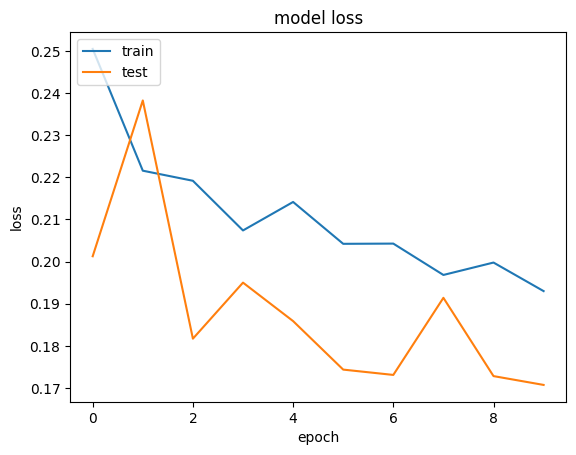

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(df_normalized_test)
print(y_pred.shape)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
(401, 2)


In [37]:
ids = []
predicted = []
for i, sample_id in enumerate(df_test['Id']):
    ids.append(sample_id)
    predicted.append(y_pred[i, 1])
    
result_df = pd.DataFrame({'Id': ids, 'Predicted': predicted})

# Export the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)

print("Predictions exported to predictions.csv successfully!")

Predictions exported to predictions.csv successfully!
